In [2]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

4228


In [5]:
data_folder = r'\\10.245.74.158\Chromatin_NAS_7\20220528-IMR90_test_SI14'
image_filenames = [os.path.join(data_folder, _fl) for _fl in os.listdir(data_folder) if _fl.split(os.extsep)[-1] == 'dax']

In [7]:
correction_folder = r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50'

In [11]:
cls_list = []
for _file in image_filenames:
    _cls = classes.preprocess.DaxProcesser(
        _file, 
        CorrectionFolder=correction_folder, 
        DriftChannel=488, DapiChannel=405)
    _cls._load_image(sel_channels=[750,647,405])
    _cls._corr_illumination()
    cls_list.append(_cls)

Initialize DaxProcesser for file:\\10.245.74.158\Chromatin_NAS_7\20220528-IMR90_test_SI14\zscan_750_647_488_405_s30_n250_0001.dax
-- all used channels: ['750', '647', '488', '405']
-- single image size: [  30 2048 2048]
- Loaded images for channels:['750', '647', '405'] in 8.784s.
- Start illumination correction for channels:['750', '647', '405'].
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 405 illumination_correction_405_2048x2048.npy
-- corrected illumination for channel 750 in 4.000s.
-- corrected illumination for channel 647 in 3.985s.
-- corrected illumination for channel 405 in 3.875s.
- Finished illumination correction in 12.125s.
Initialize DaxProcesser for file:\\10.245.74.158\Chromatin_NAS_7\20220528-IMR90_test_SI14\zscan_750_647_488_405_s30_n250_0002.dax
-- all used channels: ['750', '647', '488', '405']
-- single image size: [  30 2048 2048]
- Loaded images for channe

In [18]:
crop = [slice(0,30), slice(1000,1200), slice(700,1100)]

C:\Users\puzheng\AppData\Local\Temp/ipykernel_4228/23892927.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  visual_tools.imshow_mark_3d_v2([cls_list[fov_id].im_750[crop], cls_list[fov_id].im_647[crop], cls_list[fov_id].im_405[crop]],


<IPython.core.display.Javascript object>


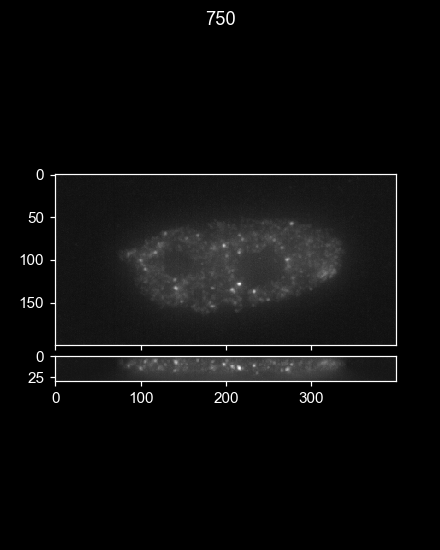

In [60]:
plt.style.use('dark_background')
fov_id = 1
visual_tools.imshow_mark_3d_v2([cls_list[fov_id].im_750[crop], cls_list[fov_id].im_647[crop], cls_list[fov_id].im_405[crop]],
                               image_names=['750', '647', '405'], min_max_default=[2000,20000])

# Load reference data

In [39]:
ref_data_folder = r'\\10.245.74.212\Chromatin_NAS_2\20190727_IMR90_intron-DNA-MERFISH\H58R1,R26'

ref_image_filenames = [os.path.join(ref_data_folder, _fl) 
                       for _fl in os.listdir(ref_data_folder) if _fl.split(os.extsep)[-1] == 'dax']

In [40]:
ref_image_filenames[0]

'\\\\10.245.74.212\\Chromatin_NAS_2\\20190727_IMR90_intron-DNA-MERFISH\\H58R1,R26\\Conv_zscan_00.dax'

In [55]:
ref_cls_list = []
for _file in ref_image_filenames[10:]:
    print(_file)
    _ref_cls = classes.preprocess.DaxProcesser(
        _file, 
        CorrectionFolder=correction_folder, Channels=['750','647','488'],
        DriftChannel=488, DapiChannel=405)
    _ref_cls._load_image(sel_channels=[750,647,488], NbufferFrame=10, ImSize=[60,2048,2048])
    _ref_cls._corr_illumination()
    ref_cls_list.append(_ref_cls)
    
    break

\\10.245.74.212\Chromatin_NAS_2\20190727_IMR90_intron-DNA-MERFISH\H58R1,R26\Conv_zscan_10.dax
Initialize DaxProcesser for file:\\10.245.74.212\Chromatin_NAS_2\20190727_IMR90_intron-DNA-MERFISH\H58R1,R26\Conv_zscan_10.dax
- Loaded images for channels:['750', '647', '488'] in 5.196s.
- Start illumination correction for channels:['750', '647', '488'].
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- corrected illumination for channel 750 in 8.828s.
-- corrected illumination for channel 647 in 7.594s.
-- corrected illumination for channel 488 in 7.625s.
- Finished illumination correction in 24.313s.


In [65]:
crop = [slice(0,60), slice(850,1150), slice(850,1250)]

C:\Users\puzheng\AppData\Local\Temp/ipykernel_4228/916408366.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  visual_tools.imshow_mark_3d_v2([ref_cls_list[fov_id].im_750[crop], ref_cls_list[fov_id].im_647[crop], ref_cls_list[fov_id].im_488[crop]],


<IPython.core.display.Javascript object>


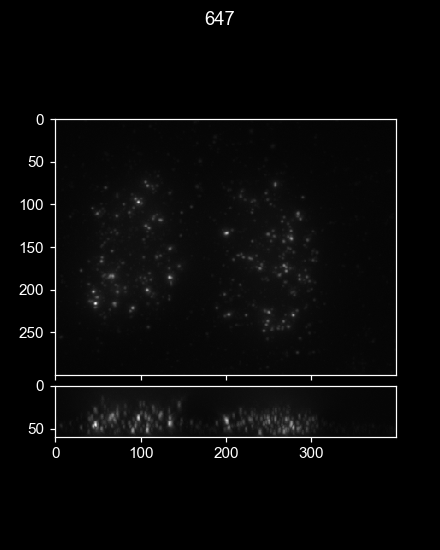

In [67]:
plt.style.use('dark_background')
fov_id = 0
visual_tools.imshow_mark_3d_v2([ref_cls_list[fov_id].im_750[crop], ref_cls_list[fov_id].im_647[crop], ref_cls_list[fov_id].im_488[crop]],
                               image_names=['750', '647', '488'], min_max_default=[2000,20000])